In [60]:
def dropdown(a,des):
    d = widgets.Dropdown(
        options=a,
        value=a[0],
        description=des,
        disabled=False,
        continuous_update=True,
        orientation='vertical',
        readout=True
    )
    return d

In [61]:
def slider(minimun, maximum, v, des):
    d = widgets.IntSlider(
        value=v,
        min=minimun,
        max=maximum,
        step=1,
        description=des,
        disabled=False,
        continuous_update=False,
        readout=True
    )
    return d

In [62]:
def decision_tree():
    criterion = dropdown(['gini', 'entropy'],'criterion')
    splitter = dropdown(['best', 'random'], 'splitter')
    max_features = dropdown(['auto', 'sqrt', 'log2'], 'max_features')
    random_state = slider(0,100,0,'random_state')

    def f(a,b,c,d):
        from sklearn.tree import DecisionTreeClassifier
        r6 = DecisionTreeClassifier(criterion=a, splitter=b,max_features=c,random_state=d)
        r6.fit(X_train,y_train)

        r6_pred = r6.predict(X_test)

        from sklearn.metrics import confusion_matrix, accuracy_score
        c6 = confusion_matrix(y_test,r6_pred)
        print(c6)
        print(accuracy_score(y_test,r6_pred))

    # Using interactive_output function to display output only once.
    out = widgets.interactive_output(f, {'a': criterion, 'b': splitter, 'c': max_features, 'd': random_state})

    display(criterion, splitter, max_features,random_state, out)

In [63]:
def logistic_regression():
    solver = dropdown(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'Solver')

    multi_class = dropdown(['auto', 'ovr', 'multinomial'],'multi_class')

    random_state = slider(0,100,0,'random_state')

    def f(a,b,c):
        from sklearn.linear_model import LogisticRegression
        r1 = LogisticRegression(solver=a, multi_class=b ,random_state=c)
        r1.fit(X_train,y_train)

        r1_pred = r1.predict(X_test)

        from sklearn.metrics import confusion_matrix, accuracy_score
        c1 = confusion_matrix(y_test,r1_pred)
        print(c1)
        print(accuracy_score(y_test,r1_pred))

    # Using interactive_output function to display output only once.
    out = widgets.interactive_output(f, {'a': solver, 'b': multi_class, 'c': random_state})

    display(solver, multi_class, random_state, out)

In [64]:
def knn():
    n_neighbors = slider(1,100,5,'n_neighbours')
    
    weights = dropdown(['uniform', 'distance'],'Weights')
    
    algorithm = dropdown(['auto', 'ball_tree', 'kd_tree', 'brute'],'Algorithm')

    def f(a,b,c):
        from sklearn.neighbors import KNeighborsClassifier
        r2 = KNeighborsClassifier(n_neighbors=a, weights=b, algorithm=c)
        r2.fit(X_train,y_train)

        r2_pred = r2.predict(X_test)

        from sklearn.metrics import confusion_matrix, accuracy_score
        c2 = confusion_matrix(y_test,r2_pred)
        print(c2)
        print(accuracy_score(y_test,r2_pred))

    out = widgets.interactive_output(f, {'a': n_neighbors, 'b': weights, 'c': algorithm})

    display(n_neighbors, weights, algorithm, out)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

dataset = pd.read_csv('titanic.csv')
X = dataset.iloc[:,[2,4,5,6,9]].values
y=dataset.iloc[:,1].values

from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,2:] = si.fit_transform(X[:,2:])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,[2,4]] = sc.fit_transform(X_train[:,[2,4]])
X_test[:,[2,4]]=sc.transform(X_test[:,[2,4]])

model = widgets.RadioButtons(
    options=['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
    value='Logistic Regression', # Defaults to 'Logistic regression'
    description='Model',
    disabled=False
)

def f(m):
    if (m=='Logistic Regression'):
        print('logistic regre')
        logistic_regression()
    elif (m=='KNN'):
        print('KNN')
        knn()
    elif (m=='SVM'):
        print('svm')
    elif (m=='Naive Bayes'):
        print('naive bayes')
    elif (m=='Decision Tree'):
        decision_tree()
    else:
        print('randomforest')
    

# Using interactive_output function to display output only once.
o = widgets.interactive_output(f, {'m': model})

display(model, o)

RadioButtons(description='Model', options=('Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree'…

Output()

In [56]:
from sklearn.metrics import accuracy_score
accuracy=[]
randoms = []
for i in range(30):
    randoms.append(i)
    from sklearn.tree import DecisionTreeClassifier
    r6 = DecisionTreeClassifier(criterion='gini',random_state=i,max_features='auto')
    r6.fit(X_train,y_train)
    r6_pred = r6.predict(X_test)
    accuracy.append(accuracy_score(y_test,r6_pred)*100)

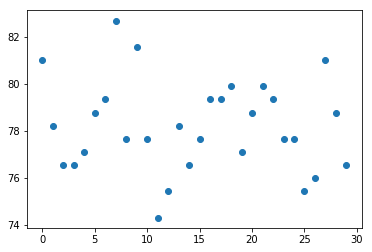

In [57]:
import matplotlib.pyplot as plt
plt.scatter(randoms, accuracy)